In [9]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split  # Import train_test_split here
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import os
from PIL import Image
import numpy as np

# Import file with data
data = pd.read_csv("small1.csv")

# read the images
folder_path = "bikeImages"
images = []
for filename in os.listdir(folder_path):    # Iterate through all files in the folder
    if filename.endswith(('.png')):
        file_path = os.path.join(folder_path, filename)
        img = Image.open(file_path)  # Open the image
        images.append(img)  # Add the image to the list
# Resize images 
resizedImages = [img.resize((img.size[0] // 4, img.size[1] // 4)) for img in images]
img_rows, img_cols = 384, 177   
# Convert the list of images to a NumPy array
imageArray = np.array([np.array(img) for img in resizedImages])
# input_shape = (img_rows, img_cols, 1)
trainImages, validationImages = train_test_split(imageArray, test_size=0.2, random_state=42)

# selectedFeatures = ['Shoe up angle', 'Down tube front diameter', 'Shoe sideways', 'Front  fender width', 'Fit scheme']
extractedData = data[['Fit scheme']]

trainData, validationData = train_test_split(extractedData, test_size=0.2, random_state=42)
# trainFeatures = trainData[['Shoe up angle', 'Down tube front diameter', 'Shoe sideways', 'Front  fender width']]
# validationFeatures = validationData[['Shoe up angle', 'Down tube front diameter', 'Shoe sideways', 'Front  fender width']]

# Encode the labels
label_encoder = LabelEncoder()
trainTarget = label_encoder.fit_transform(trainData['Fit scheme'])
trainLabels = tf.keras.utils.to_categorical(trainTarget, len(label_encoder.classes_))
validationTarget = label_encoder.transform(validationData['Fit scheme'])
validationlabels = tf.keras.utils.to_categorical(validationTarget, len(label_encoder.classes_))



In [10]:
# design a CNN
modelCNN = tf.keras.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(4, activation='softmax')
])

modelCNN.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])
modelCNN.summary()


C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 382, 175, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 380, 173, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 190, 86, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 190, 86, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 522880)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │    16,732,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,737,412 (63.85 MB)

 Trainable params: 16,737,412 (63.85 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
historyCNN = modelCNN.fit(trainImages, trainLabels, batch_size=16, epochs=3)

Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 658ms/step - accuracy: 0.6136 - loss: 557970358272.0000
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - accuracy: 0.6919 - loss: 1.3752
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 575ms/step - accuracy: 0.7053 - loss: 3914745.0000


In [12]:
predictedProbabilities = modelCNN.predict(validationImages)
print(predictedProbabilities)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [16]:
predictedLabels = np.argmax(predictedProbabilities, axis=1)
print(predictedLabels)
for p in predictedLabels:
    print(label_encoder.classes_[p])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross


In [14]:
# validate the trained CNN
performanceMetrics = modelCNN.evaluate(validationImages, validationlabels)
print(performanceMetrics)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.0000e+00 - loss: 939.9496
[939.9495849609375, 0.0]


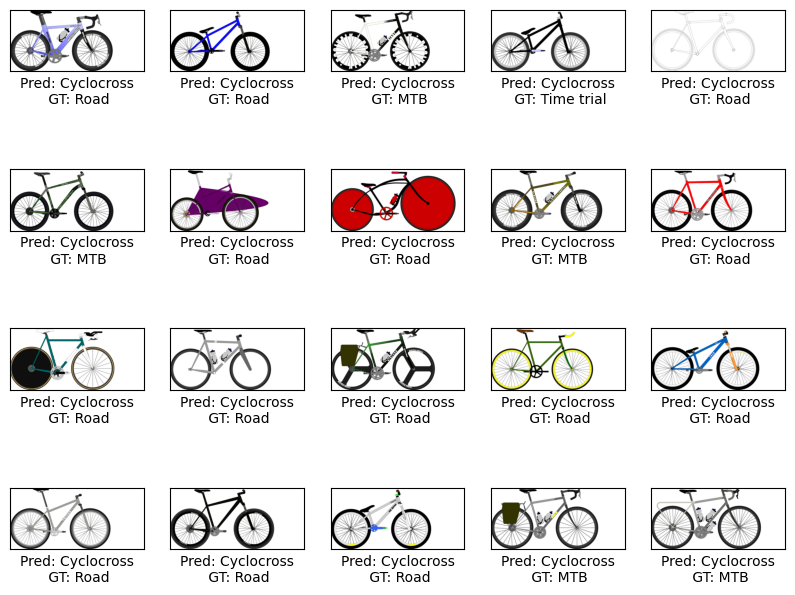

In [15]:
from matplotlib import pyplot as plt
n = len(validationImages)
classNames = label_encoder.classes_
plt.figure(figsize=(10,10))
for i in range(n):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(validationImages[i], cmap=plt.cm.binary)
    caption = "Pred: " + str(classNames[predictedLabels[i]]) + "\n GT: " + str(label_encoder.classes_[validationTarget[i]])
    plt.xlabel(caption)
plt.show()